# Metient-evaluate

### This tutorial is intended for those who want to run Metient in evaluate mode, and have Metient infer (1) the proportions of each clone in each anatomical site, and (2) the labeled clone tree. 

### To run this notebook, you'll need metient installed:

```bash
mamba create -n "met" python=3.8.8 ipython
mamba activate met
pip install metient
```

### Import libraries and setup paths

In [1]:
import os
from metient import metient as met

### Setup paths
# Path to where our input clone trees and tsvs are located
input_dir = os.path.join(os.getcwd(), "inputs")
# Path to save outputs
output_dir = os.path.join(os.getcwd(), "1_outputs")

CUDA GPU: False


### An example of the expected tsv file format for melanoma patient A
**The required columns are:**
`anatomical_site_index, anatomical_site_label, cluster_index, character_index, character_label, ref, var, var_read_prob, site_category` (see `../README.md` for description of each column)

In [2]:
import pandas as pd
df = pd.read_csv(os.path.join(input_dir, "A_SNVs.tsv"), sep="\t")
df

,anatomical_site_index,anatomical_site_label,cluster_index,character_index,character_label,ref,var,var_read_prob,site_category
0,0,"Primary, forehead",1,0,ADCY5,213,118,0.380,primary
1,1,Parotid metastasis,1,0,ADCY5,382,27,0.105,metastasis
2,2,"Locoregional skin metastasis 1, forehead",1,0,ADCY5,319,67,0.210,metastasis
3,3,"Locoregional skin metastasis 2, angle jaw",1,0,ADCY5,188,66,0.310,metastasis
4,0,"Primary, forehead",1,1,ZNF148,117,58,0.380,primary
...,...,...,...,...,...,...,...,...,...
535,3,"Locoregional skin metastasis 2, angle jaw",2,133,TECTA,120,55,0.310,metastasis
536,0,"Primary, forehead",0,134,ANKRD17,160,116,0.380,primary
537,1,Parotid metastasis,0,134,ANKRD17,302,33,0.105,metastasis
538,2,"Locoregional skin metastasis 1, forehead",0,134,ANKRD17,278,68,0.210,metastasis


## Step 1: Run Metient-evaluate on each patient individually

/lila/data/morrisq/divyak/projects/metient/tutorial/1_outputs/tmp_A_clustered_SNVs.tsv
ordered_sites ['Primary, forehead', 'Parotid metastasis', 'Locoregional skin metastasis 1, forehead', 'Locoregional skin metastasis 2, angle jaw']
calculate_batch_size 1504


 36%|███▌      | 59/166 [00:01<00:07, 13.91it/s]/lila/data/morrisq/divyak/projects/metient/metient/lib/vertex_labeling.py:605: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3614.)
  known_labelings.append(torch.eye(num_sites)[optimal_site].T)
100%|██████████| 166/166 [00:04<00:00, 40.57it/s]


pareto_metrics {(6, 3, 1)}
# final solutions: 1
A_Primary, forehead
5 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

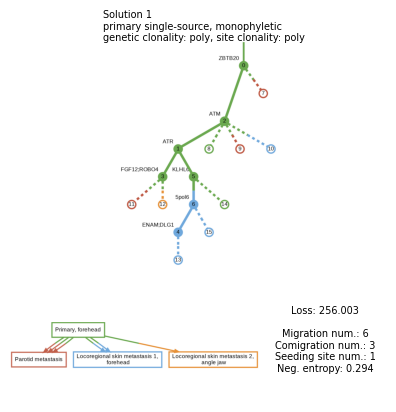

/lila/data/morrisq/divyak/projects/metient/tutorial/1_outputs/tmp_C_clustered_SNVs.tsv
ordered_sites ['Primary, right lower calf', 'Locoregional skin metastasis 1, right calf', 'Locoregional skin metastasis 2, right mid-calf']
calculate_batch_size 1384


100%|██████████| 166/166 [01:05<00:00,  2.54it/s]


pareto_metrics {(5, 2, 1)}
# final solutions: 2
C_Primary, right lower calf
5 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

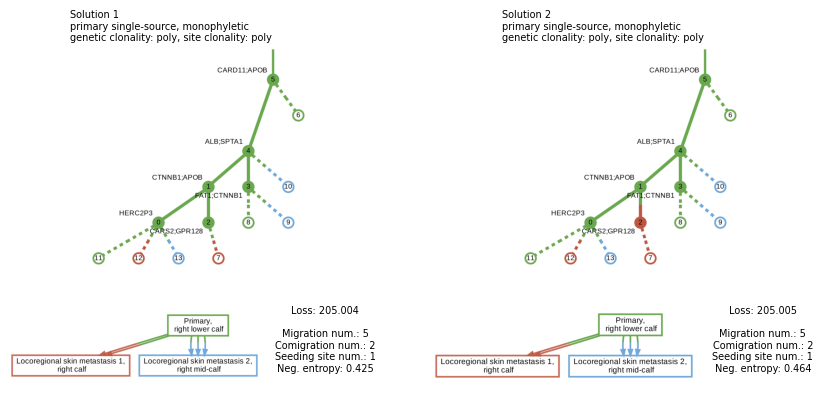

/lila/data/morrisq/divyak/projects/metient/tutorial/1_outputs/tmp_E_clustered_SNVs.tsv
ordered_sites ['Primary, left heel', 'Locoregional skin metastasis 1, left heel', 'Locoregional skin metastasis 2, left heel', 'Lymph node metastasis, left groin', 'Locoregional skin metastasis 3, left heel']
calculate_batch_size 1624


100%|██████████| 166/166 [00:04<00:00, 34.30it/s]


pareto_metrics {(10, 4, 1), (9, 5, 2)}
# final solutions: 3
E_Primary, left heel
5 unique trees were not found (3 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

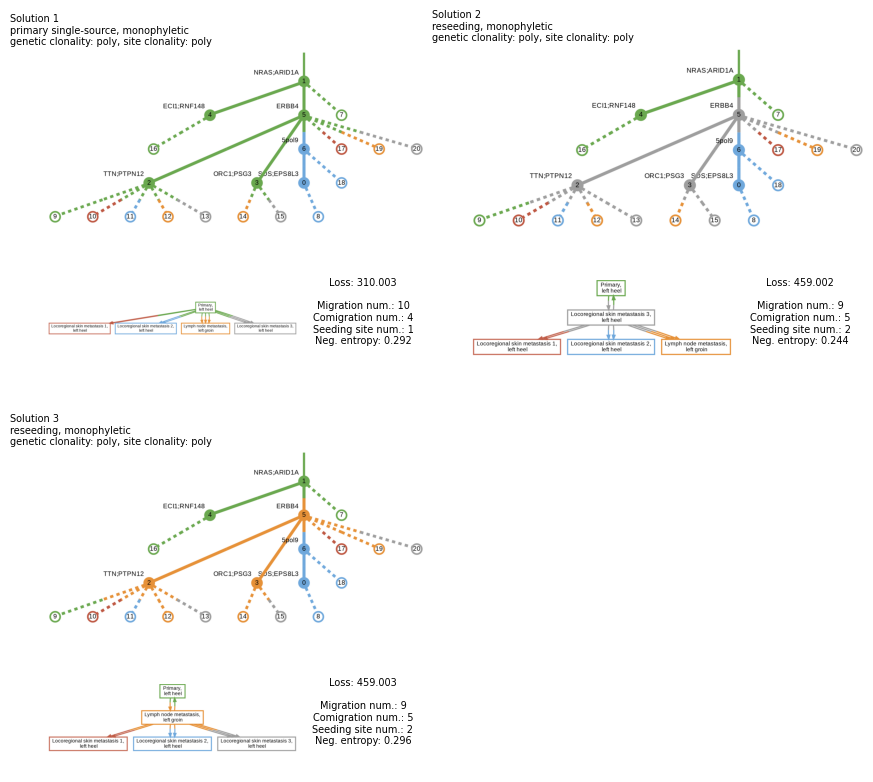

/lila/data/morrisq/divyak/projects/metient/tutorial/1_outputs/tmp_G_clustered_SNVs.tsv
ordered_sites ['Primary, right forearm', 'Lung metastasis', 'Locoregional skin metastasis, axilla']
calculate_batch_size 1264


100%|██████████| 166/166 [00:01<00:00, 91.02it/s] 


pareto_metrics {(4, 2, 1)}
# final solutions: 4
G_Primary, right forearm
5 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

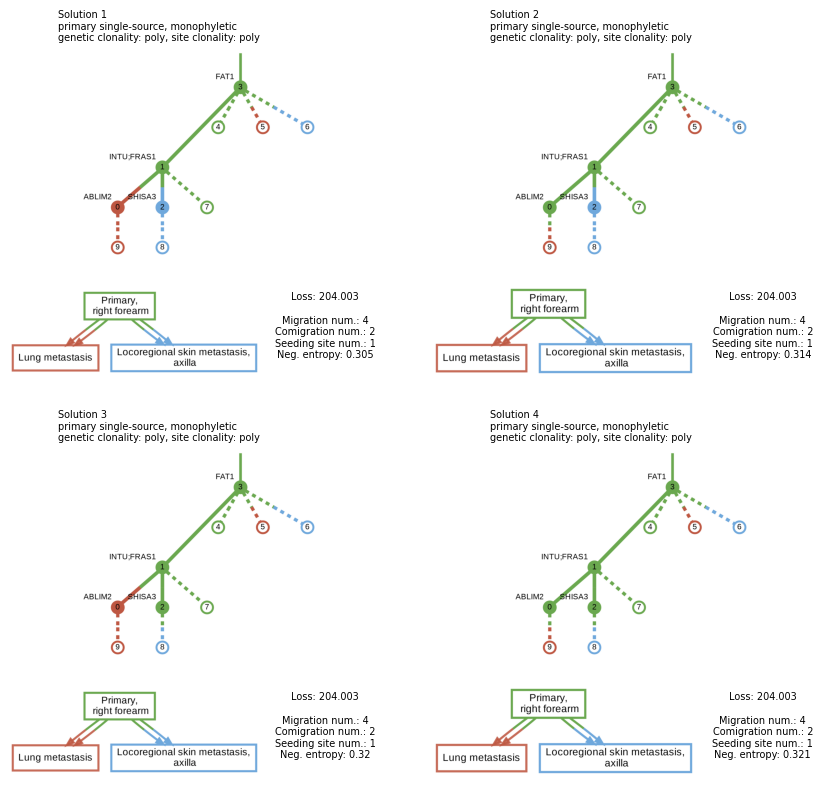

In [3]:
patients = ["A", "C", "E", "G"]

print_config = met.PrintConfig(visualize=True, verbose=False, k_best_trees=5)
weights = met.Weights(mig=1, comig=50, seed_site=100)

for patient in patients:
    clone_tree_fn = os.path.join(input_dir, f"{patient}_tree.txt")
    ref_var_fn = os.path.join(input_dir, f"{patient}_SNVs.tsv")
    met.evaluate(clone_tree_fn, ref_var_fn, weights, print_config, output_dir, patient, solve_polytomies=True)


## Step 3: Use the pickle file outputs for downstream analysis

### In addition to the visualizations that Metient provides, we also save pkl.gz files for each Metient run that contain all the results of the run.

In [4]:
import gzip
import pickle

with gzip.open(os.path.join(output_dir,"calibrate", "A_Primary, forehead.pkl.gz") ,"rb") as f:
    pckl = pickle.load(f)
print(pckl.keys())

# V is the best ancestral labeling
V = pckl['clone_tree_labelings'][0]
# A is the adjacency matrix that is the input clone tree + inferred leaf nodes
A = pckl['full_adjacency_matrices'][0]

# G represents the migration graph
G = met.migration_graph(V, A)
print("\nmigration graph:\n", G)

# Show other information about this patient's inferred migration history
print("\nseeding pattern:", met.seeding_pattern(V, A))
print("seeding clusters:", met.seeding_clusters(V, A))
print("phyleticity:", met.phyleticity(V, A))
print("site clonality:", met.site_clonality(V, A))
print("genetic clonality:", met.genetic_clonality(V, A))

dict_keys(['clone_tree_labelings', 'losses', 'full_tree_node_idx_to_labels', 'full_adjacency_matrices', 'ordered_anatomical_sites', 'loss_dict', 'primary_site', 'soft_v', 'gen_dist_matrices', 'observed_clone_matrix'])

migration graph:
 tensor([[0., 3., 2., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

seeding pattern: primary single-source
seeding clusters: [0, 2, 3, 5]
phyleticity: monophyletic
site clonality: polyclonal
genetic clonality: polyclonal
